# CHLA

In [186]:
# raw readings and excel calculations are in mbl_nuts112025/

In [187]:
library(ggplot2)
library(tidyverse)

In [188]:
setwd('/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients/mbl_nuts112025')

In [189]:
chla<-read.csv('chla_processed.csv')
metadata <- read.csv('metadata/mbl_nutrient_list.csv')

## Data Cleanup 

In [190]:
head(chla)

,Sample.ID,mL.Filt,L.Filt,ug.Chl.a,ug.phaeophytin,ug.L.Chl.a,ug.L.phaeo,Dilution.Factor,Corrected..for.Dilution.ug.L.Chl.a,Corrected.for.Dilution.ug.L.phaeo
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,T6 291,180,0.18,5.35845321,1.0588918,0.297691845,0.05882732,1,0.297691845,0.05882732
2,T5 317,180,0.18,-0.06826055,1.6493456,-0.003792253,0.09163031,1,-0.003792253,0.09163031
3,T3 451,180,0.18,5.05128073,0.9568423,0.280626707,0.05315790,1,0.280626707,0.05315790
4,T3 452,180,0.18,1.75770917,0.8464308,0.097650510,0.04702394,1,0.097650510,0.04702394
5,T6 267,180,0.18,3.61780917,0.6232188,0.200989399,0.03462327,1,0.200989399,0.03462327
6,T3 353,180,0.18,3.54954862,2.8677964,0.197197146,0.15932202,1,0.197197146,0.15932202


In [191]:
# separate sample IDs
chla<-chla %>%
    mutate(T = sapply(strsplit(Sample.ID, split = " "), "[",1)) %>%
    mutate(sample.id = if_else(
        # apply string split to everything except DI chla_final
        # if sampleID is DI, keep whole value, if NOT, apply str split 
        str_detect(Sample.ID,'DI'), Sample.ID, sapply(strsplit(Sample.ID, split = " "), "[",2)))

# fix mistakes
chla<-chla %>% 
    mutate(sample.id = str_replace(sample.id, "O","")) # one random sample has an O instead of a 0 

In [192]:
# match with metadata
metadata<-metadata %>%
    mutate(sample.id = str_replace(nutrient_sample_., pattern = 'N',''))

head(metadata,2)

,Date,country,site,transect.,depth.m.,meter.,syringe.,nutrient_sample_.,time_sampled,time_processed,nutrient,vol_filtered..mL.,notes,nitrate,X,Pack_for_MBL,sample.id
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1/8/24,BEL,BB,5,1.6,10,15,N018,16:21,18:30,,60,labelled as T1,5_19,x,x,018
2,1/8/24,BEL,BB,5,1.6,10,,N017,16:21,18:30,CHLA,180,labelled as T1,,,x,017


In [193]:
# make numeric 
chla<-chla %>%
    mutate(sample.id = as.numeric(sample.id))
metadata<-metadata %>%
    mutate(sample.id = as.numeric(sample.id))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `sample.id = as.numeric(sample.id)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `sample.id = as.numeric(sample.id)`.
Caused by warning:
! NAs introduced by coercion”


In [194]:
# fix 1 NA sample  
metadata<-metadata %>%  
    mutate(sample.id = if_else(
        nutrient_sample_. == 'T1-308',308,sample.id
    ))

In [195]:
# replace T# for mislabelled samples

# pull out Transect it is currently labelled as 
# pull out transect it needs to be changed to (in samples)

metadata<-metadata %>%
    mutate(old_T = sapply(strsplit(metadata$notes,split = 'as '), "[",2)) %>%
    mutate(new_T = paste0('T',transect.))

In [196]:
head(metadata,2)

,Date,country,site,transect.,depth.m.,meter.,syringe.,nutrient_sample_.,time_sampled,time_processed,nutrient,vol_filtered..mL.,notes,nitrate,X,Pack_for_MBL,sample.id,old_T,new_T
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,1/8/24,BEL,BB,5,1.6,10,15,N018,16:21,18:30,,60,labelled as T1,5_19,x,x,18,T1,T5
2,1/8/24,BEL,BB,5,1.6,10,,N017,16:21,18:30,CHLA,180,labelled as T1,,,x,17,T1,T5


In [197]:
head(chla)

,Sample.ID,mL.Filt,L.Filt,ug.Chl.a,ug.phaeophytin,ug.L.Chl.a,ug.L.phaeo,Dilution.Factor,Corrected..for.Dilution.ug.L.Chl.a,Corrected.for.Dilution.ug.L.phaeo,T,sample.id
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,T6 291,180,0.18,5.35845321,1.0588918,0.297691845,0.05882732,1,0.297691845,0.05882732,T6,291
2,T5 317,180,0.18,-0.06826055,1.6493456,-0.003792253,0.09163031,1,-0.003792253,0.09163031,T5,317
3,T3 451,180,0.18,5.05128073,0.9568423,0.280626707,0.05315790,1,0.280626707,0.05315790,T3,451
4,T3 452,180,0.18,1.75770917,0.8464308,0.097650510,0.04702394,1,0.097650510,0.04702394,T3,452
5,T6 267,180,0.18,3.61780917,0.6232188,0.200989399,0.03462327,1,0.200989399,0.03462327,T6,267
6,T3 353,180,0.18,3.54954862,2.8677964,0.197197146,0.15932202,1,0.197197146,0.15932202,T3,353


In [198]:
# join 
chla<-chla %>%
    left_join(metadata%>%select(-depth.m., -nitrate,-X,-syringe.,-Pack_for_MBL), by = 'sample.id')
# update incorrectly labelled sample locations
chla<-chla %>%
    mutate(T_copy = new_T) %>%
    mutate(T_copy = if_else(
        is.na(T_copy),T,T_copy
    ))

In [199]:
colnames(chla)
head(chla)

[1] "Sample.ID"                          "mL.Filt"                           
 [3] "L.Filt"                             "ug.Chl.a"                          
 [5] "ug.phaeophytin"                     "ug.L.Chl.a"                        
 [7] "ug.L.phaeo"                         "Dilution.Factor"                   
 [9] "Corrected..for.Dilution.ug.L.Chl.a" "Corrected.for.Dilution.ug.L.phaeo" 
[11] "T"                                  "sample.id"                         
[13] "Date"                               "country"                           
[15] "site"                               "transect."                         
[17] "meter."                             "nutrient_sample_."                 
[19] "time_sampled"                       "time_processed"                    
[21] "nutrient"                           "vol_filtered..mL."                 
[23] "notes"                              "old_T"                             
[25] "new_T"                              "T_copy"

,Sample.ID,mL.Filt,L.Filt,ug.Chl.a,ug.phaeophytin,ug.L.Chl.a,ug.L.phaeo,Dilution.Factor,Corrected..for.Dilution.ug.L.Chl.a,Corrected.for.Dilution.ug.L.phaeo,⋯,meter.,nutrient_sample_.,time_sampled,time_processed,nutrient,vol_filtered..mL.,notes,old_T,new_T,T_copy
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,T6 291,180,0.18,5.35845321,1.0588918,0.297691845,0.05882732,1,0.297691845,0.05882732,⋯,40,N291,,,CHLA,180,,NA,T6,T6
2,T5 317,180,0.18,-0.06826055,1.6493456,-0.003792253,0.09163031,1,-0.003792253,0.09163031,⋯,20,N317,,4:22,CHLA,,,NA,T5,T5
3,T3 451,180,0.18,5.05128073,0.9568423,0.280626707,0.05315790,1,0.280626707,0.05315790,⋯,10,N451,,12:02,CHLA,,,NA,T3,T3
4,T3 452,180,0.18,1.75770917,0.8464308,0.097650510,0.04702394,1,0.097650510,0.04702394,⋯,20,N452,,12:07,CHLA,,,NA,T3,T3
5,T6 267,180,0.18,3.61780917,0.6232188,0.200989399,0.03462327,1,0.200989399,0.03462327,⋯,0,N267,13:39,17:13,,60,,NA,T5,T5
6,T3 353,180,0.18,3.54954862,2.8677964,0.197197146,0.15932202,1,0.197197146,0.15932202,⋯,10,N353,,17:09,CHLA,,,NA,T3,T3


In [200]:
chla_samples<-chla %>%
    select(Sample.ID,T, sample.id,nutrient_sample_.,old_T,new_T,T_copy,Date)

In [201]:
chla_samples %>%
    filter(is.na(nutrient_sample_.))

Sample.ID,T,sample.id,nutrient_sample_.,old_T,new_T,T_copy,Date
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
T3 634,T3,634,NA,NA,NA,T3,NA
T3 632,T3,632,NA,NA,NA,T3,NA
T3 633,T3,633,NA,NA,NA,T3,NA
T6 494,T6,494,NA,NA,NA,T6,NA
T5 434,T5,434,NA,NA,NA,T5,NA
T3 305,T3,305,NA,NA,NA,T3,NA
T5 471,T5,471,NA,NA,NA,T5,NA
T3 631,T3,631,NA,NA,NA,T3,NA
T5 470,T5,470,NA,NA,NA,T5,NA


In [202]:
# the T3 600s are 5/2025 -> data sheet was lost
    # updating metadata 
# T5 and T6 400s are the wrong filter -> discard
# t3 305 might be a typo?

In [203]:
chla_meta <-metadata %>%
    filter(nutrient == 'CHLA')
chla_meta_list <- unique(chla_meta$sample.id)

chla_sample_list <- unique(chla$sample.id)

In [204]:
# which chla samples were not run?
chla_meta_list %in% chla_sample_list
# looks like all were run 
# so idk what these extras are..maybe don't need to worry too much 

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE

In [205]:
# which samples that were run are not present in metadata?
chla_sample_list[!(chla_sample_list %in% chla_meta_list)]

[1] 267 671 634 632 633 611 675 494 434 305 672 471 674 631  NA 470 613 615 612
[20] 490

In [206]:
# update T3 600s (missing datasheet)

# columns to update 
# Date, site, new_T, vol_filtered..mL.

# T3 sample list: 634,632,633,631
list_to_fix<- c(634,632,633,631)

# update each column only if it matches the T3 600's IDs    
chla<-chla %>%
    mutate(Date = if_else(    
        # if it matches, update COL with desired value, if not -> leave as is 
        T == 'T3' & sample.id %in% list_to_fix, '5/29/25', Date)) %>%
    mutate(site = if_else(T == 'T3' & sample.id %in% list_to_fix, 'LAGOON', site)) %>%
    mutate(new_T = if_else(T == 'T3' & sample.id %in% list_to_fix, 'T3', new_T)) %>%
    mutate(vol_filtered..mL. = if_else(T == 'T3' & sample.id %in% list_to_fix, '180', vol_filtered..mL.)) 

In [207]:
# discard T5 and T6 400s (wrong filter)
# remove 305 too since idk where it came from 
chla<-chla %>%
    filter(!Sample.ID %in% c('T6 494','T5 434','T5 471','T5 470','T6 490','T3 305'))

In [208]:
# where is the volume filtered NOT 180?
unique(chla$vol_filtered..mL.)
chla %>%
    filter(vol_filtered..mL. != '180' & vol_filtered..mL. != '' & !is.na(vol_filtered..mL.))

[1] "180" ""    "60"  "160" "120" "150"

Sample.ID,mL.Filt,L.Filt,ug.Chl.a,ug.phaeophytin,ug.L.Chl.a,ug.L.phaeo,Dilution.Factor,Corrected..for.Dilution.ug.L.Chl.a,Corrected.for.Dilution.ug.L.phaeo,⋯,meter.,nutrient_sample_.,time_sampled,time_processed,nutrient,vol_filtered..mL.,notes,old_T,new_T,T_copy
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
T6 267,180,0.18,3.617809,0.6232188,0.2009894,0.03462327,1,0.2009894,0.03462327,⋯,0,N267,13:39,17:13,,60,,NA,T5,T5
T1 013,180,0.18,21.331422,4.8959880,1.1850790,0.27199933,1,1.1850790,0.27199933,⋯,50,N013,16:35,18:00,CHLA,60,labelled as T1,T1,T5,T5
T3 056,160,0.16,3.703000,1.3190000,0.2310000,0.08200000,1,0.2310000,0.08200000,⋯,20,N056,9:23,11:30,CHLA,160,,NA,T3,T3
T1 012,120,0.12,0.200000,0.1300000,0.0170000,0.01100000,1,0.0170000,0.01100000,⋯,40,N012,16:33,18:00,CHLA,120,labelled as T1,T1,T5,T5
T1 014,120,0.12,0.674000,0.7120000,0.0560000,0.05900000,1,0.0560000,0.05900000,⋯,30,N014,16:31,18:30,CHLA,120,labelled as T1,T1,T5,T5
DI 2,150,0.15,12.628000,7.6470000,0.8420000,0.51000000,1,0.8420000,0.51000000,⋯,,filter,,13:55,FILTER BLANK,150,,NA,T1,T1
DI 1,150,0.15,9.727000,14.2680000,0.6480000,0.95100000,1,0.6480000,0.95100000,⋯,,filter,,13:55,FILTER BLANK,150,,NA,T1,T1


In [209]:
# have to update volume filtered manually since concentrations were calculated in excel spreadsheet 
    # volumes of 60 are ignored bc they are data entry errors
# T3 056 vol was 160
# T1 012 - 120
# T1 014 - 120
# DI 2 - 150 
# DI 1 - 150

In [210]:
colnames(chla)

[1] "Sample.ID"                          "mL.Filt"                           
 [3] "L.Filt"                             "ug.Chl.a"                          
 [5] "ug.phaeophytin"                     "ug.L.Chl.a"                        
 [7] "ug.L.phaeo"                         "Dilution.Factor"                   
 [9] "Corrected..for.Dilution.ug.L.Chl.a" "Corrected.for.Dilution.ug.L.phaeo" 
[11] "T"                                  "sample.id"                         
[13] "Date"                               "country"                           
[15] "site"                               "transect."                         
[17] "meter."                             "nutrient_sample_."                 
[19] "time_sampled"                       "time_processed"                    
[21] "nutrient"                           "vol_filtered..mL."                 
[23] "notes"                              "old_T"                             
[25] "new_T"                              "T_copy"

In [230]:
chla_final<- chla %>%
    rename(ug.L.chla = Corrected..for.Dilution.ug.L.Chl.a) %>%
    rename(phaeo = Corrected.for.Dilution.ug.L.phaeo) %>%
    select(Sample.ID,T_copy,sample.id,Date,site,meter.,ug.L.chla,phaeo) %>%
    mutate(Date = as.Date(Date,format = "%m/%d/%y")) %>%
    mutate(monthyear = format(as.Date(Date), "%b %Y"))

In [231]:
# May and June 2025 are the same date 
chla_final<-chla_final %>%
    mutate(monthyear = if_else(
        monthyear == 'May 2025','Jun 2025',monthyear
    ))

In [232]:
chla_final<-chla_final %>%
    mutate(date_stnd = as.Date(paste0(monthyear, " 01"), format = "%b %Y %d"))

In [233]:
# remove Di blanks for now?

chla_final<-chla_final %>%
    filter(!str_detect(Sample.ID,'DI'))

## Data Viz

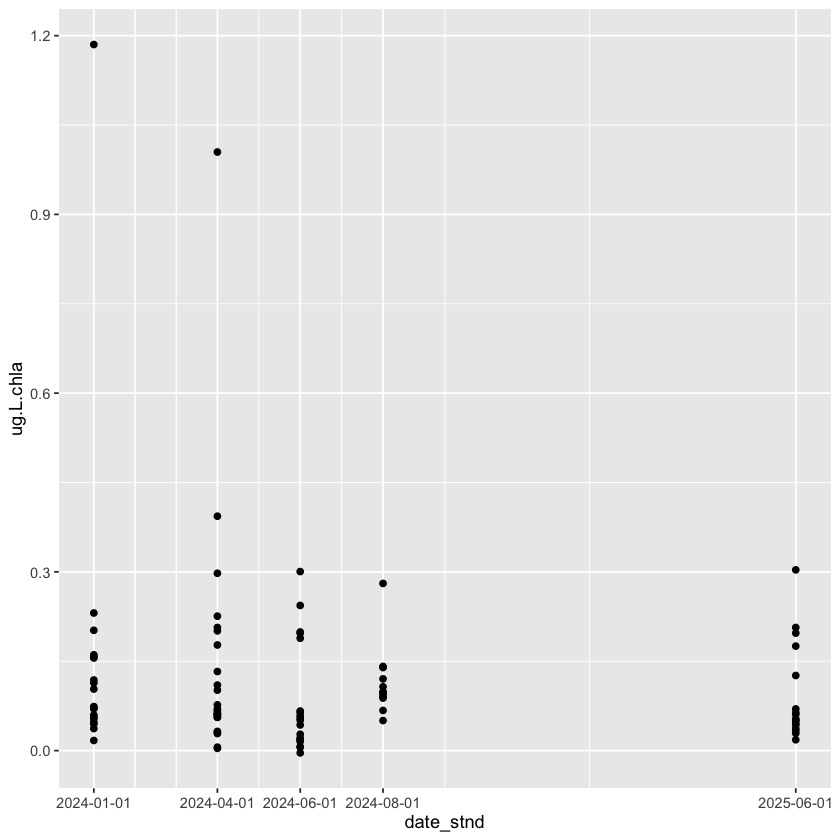

In [234]:
# plot conc by date 
ggplot(chla_final, aes(x = date_stnd, y = ug.L.chla))+
    geom_point()+
    scale_x_date(breaks = unique(chla_final$date_stnd))

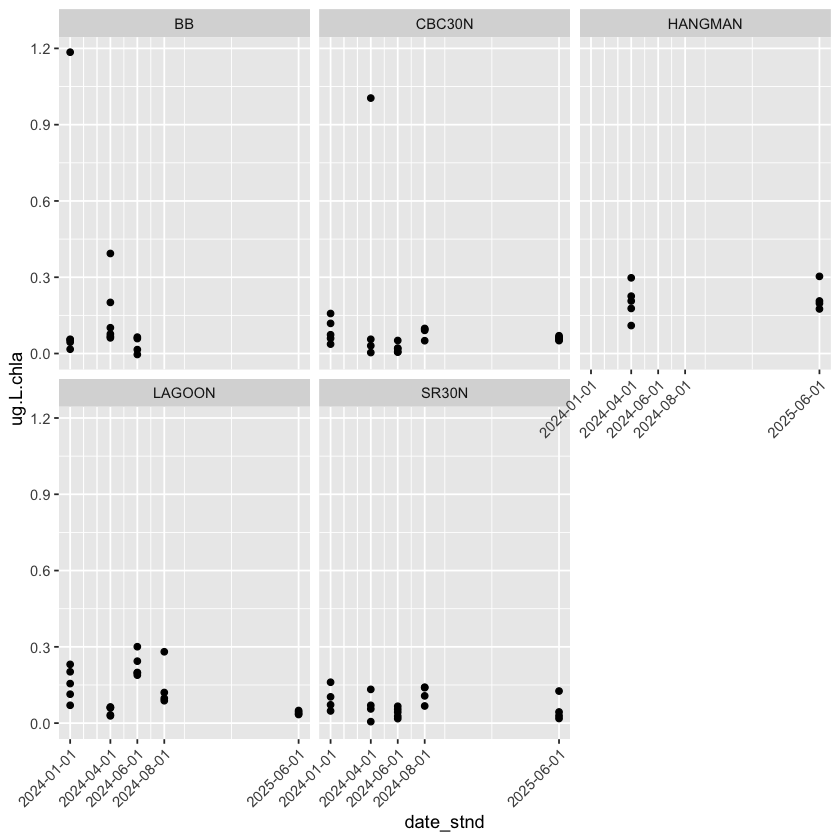

In [235]:
# facet by location 
ggplot(chla_final, aes(x = date_stnd, y = ug.L.chla))+
    geom_point()+
    facet_wrap(~ site)+
    scale_x_date(breaks = unique(chla_final$date_stnd))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [236]:
# missing aug BB and Hangman bc of filter errors 
# missing june Hangman bc of time restraints 

In [237]:
# get avgs 
chla_final %>%
    group_by(site,Date,monthyear) %>%
    summarise(chla_mean = mean(ug.L.chla),
              sd = sd(ug.L.chla),
              phaeo_mean = mean(phaeo),
              sd_p = (sd(phaeo)))

`summarise()` has grouped output by 'site', 'Date'. You can override using the
`.groups` argument.


site,Date,monthyear,chla_mean,sd,phaeo_mean,sd_p
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BB,2024-01-08,Jan 2024,0.27133551,0.511035276,0.08815561,0.104413813
BB,2024-04-28,Apr 2024,0.15026802,0.129792241,0.02368578,0.041219032
BB,2024-06-22,Jun 2024,0.03372735,0.033237999,0.04615361,0.031797203
CBC30N,2024-01-09,Jan 2024,0.08930755,0.048311239,0.05578025,0.047569529
CBC30N,2024-04-25,Apr 2024,0.27377695,0.487723675,-0.19255258,0.491159645
CBC30N,2024-06-21,Jun 2024,0.02068674,0.018454800,0.04284601,0.044667958
CBC30N,2024-08-21,Aug 2024,0.08395100,0.022560651,0.04155408,0.005683376
CBC30N,2025-05-30,Jun 2025,0.05970902,0.007820918,0.01760914,0.005285153
HANGMAN,2024-04-29,Apr 2024,0.20345436,0.068567979,0.04331890,0.017235070


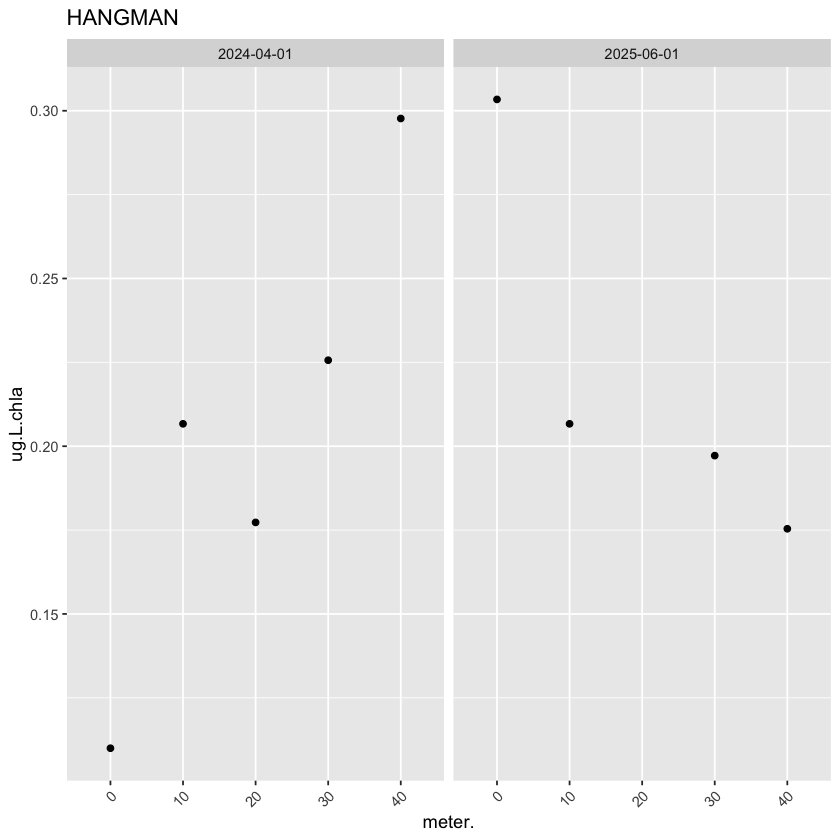

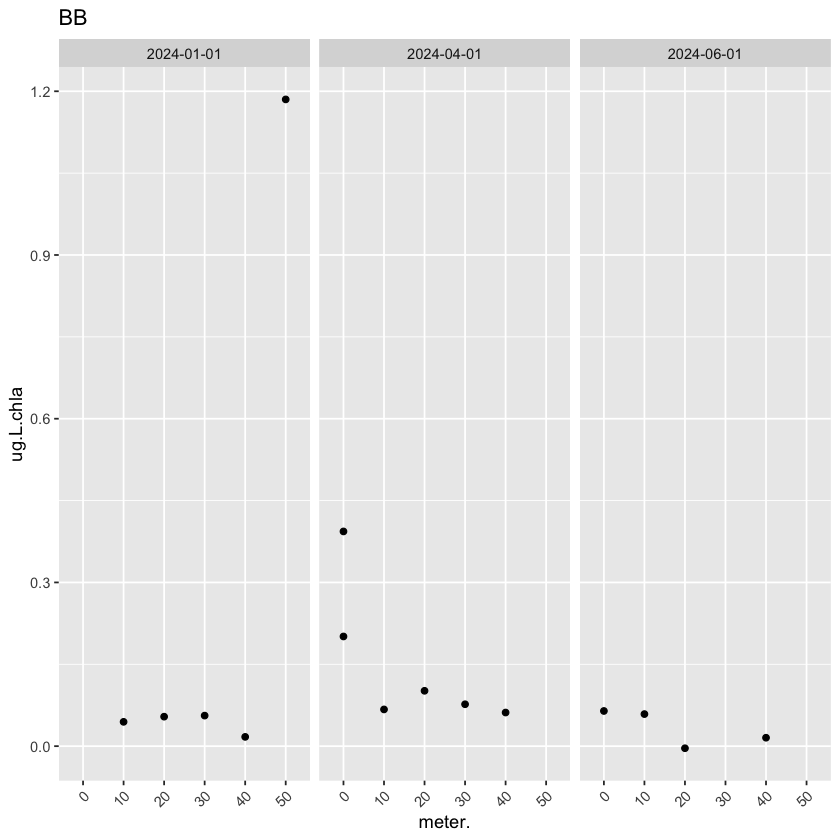

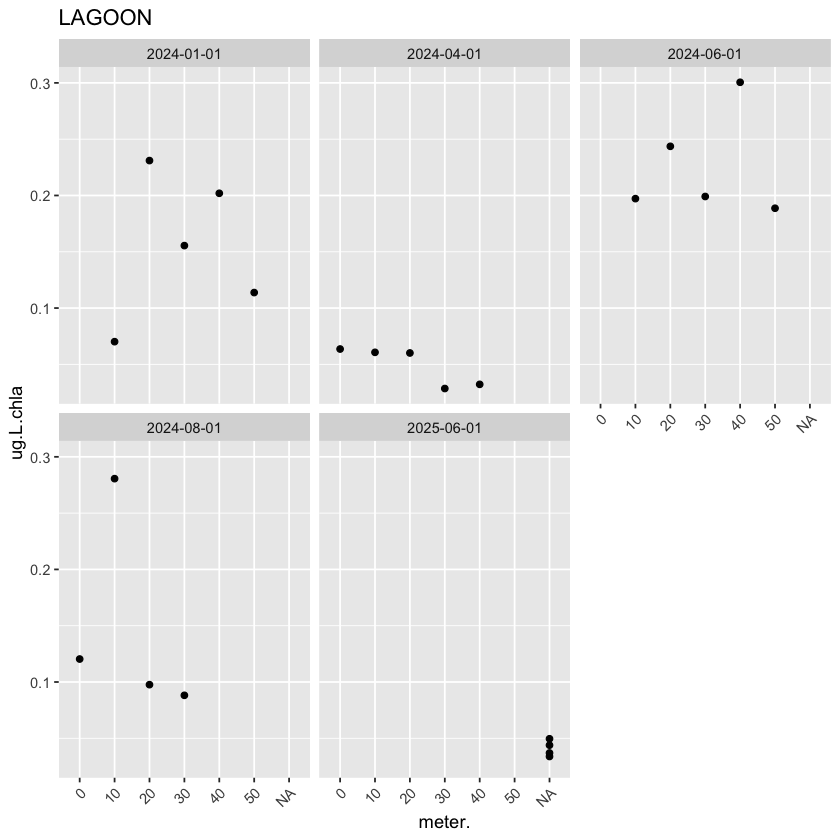

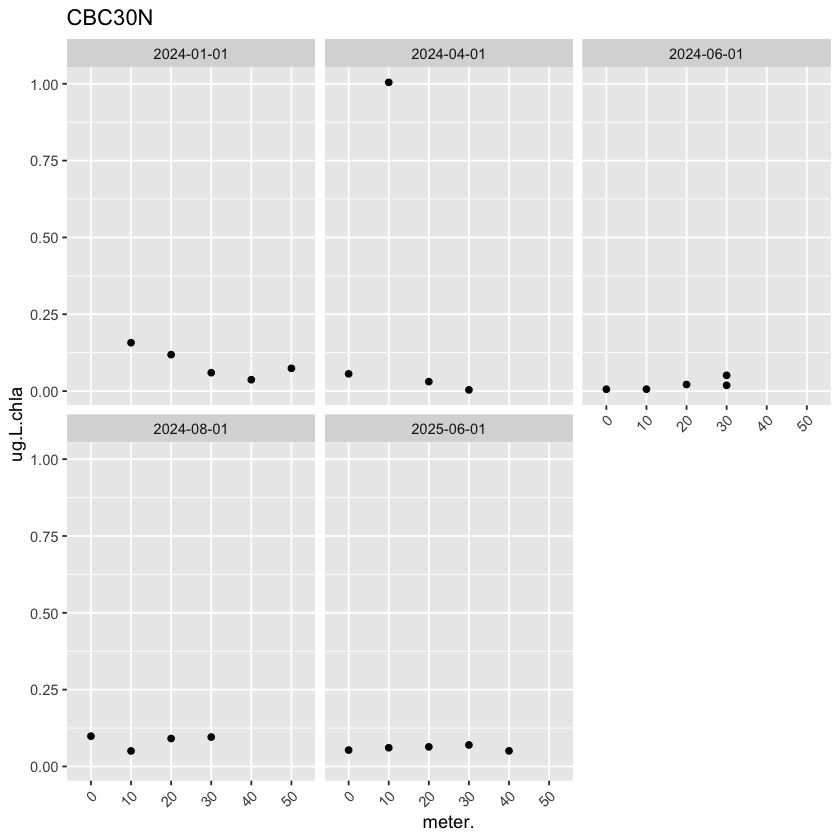

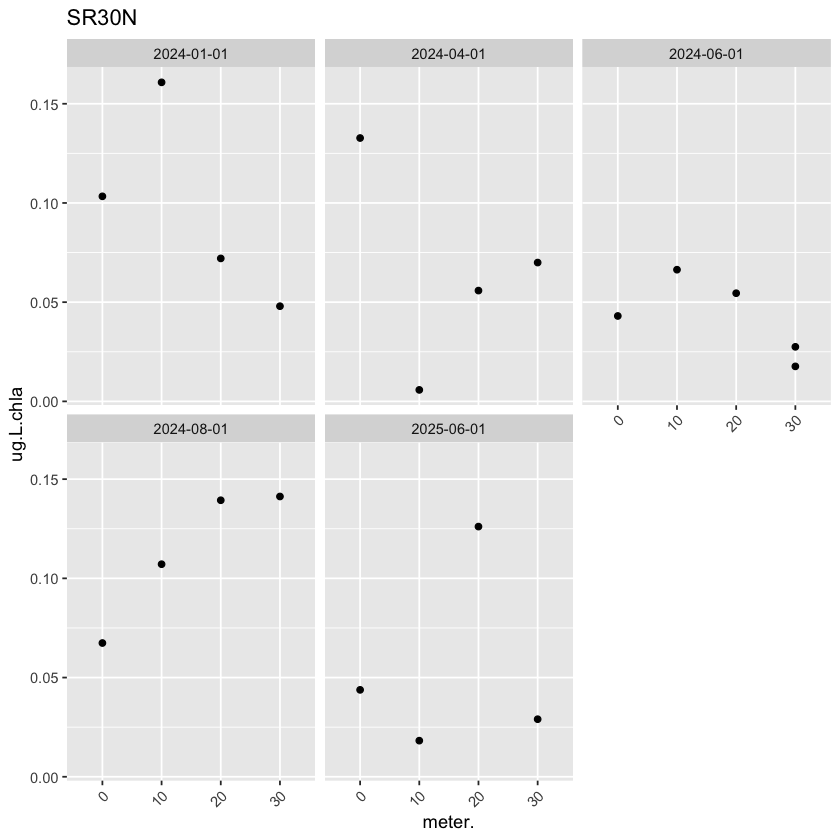

In [238]:
# variation within site within sample time point 
for (sites in unique(chla_final$site)){
    x<-ggplot(chla_final%>%filter(site==sites), aes(x = meter., y = ug.L.chla))+
        geom_point()+
        facet_wrap(~ date_stnd)+
        # scale_x_date(breaks = unique(chla_final$meter))+
        labs(title = sites)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
    print(x)
    }